In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

Predict floods based on the monthly rainfall index for each year in Kerala, India.


Facts: A flood happens when water from a river , lake , or ocean overflows onto the land around it . Too much rain or melting snow are the main causes of floods . Sometimes the soil in the ground can make a flood worse. This is because when rain falls, the soil usually soaks it up like a sponge.

Flooding is an overflowing of water onto land that is normally dry. Floods can happen during heavy rains, when ocean waves come on shore, when snow melts quickly, or when dams or levees break. Damaging flooding may happen with only a few inches of water, or it may cover a house to the rooftop. Floods can occur within minutes or over a long period, and may last days, weeks, or longer. Floods are the most common and widespread of all weather-related natural disasters.

Flash floods are the most dangerous kind of floods, because they combine the destructive power of a flood with incredible speed. Flash floods occur when heavy rainfall exceeds the ability of the ground to absorb it. They also occur when water fills normally dry creeks or streams or enough water accumulates for streams to overtop their banks, causing rapid rises of water in a short amount of time. They can happen within minutes of the causative rainfall, limiting the time available to warn and protect the public.


In [190]:
df = pd.read_csv('/Users/User/Desktop/Python/Project/flood/kerala.csv')

In [191]:
df

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO


In [192]:
print (df)

    SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL     AUG  \
0        KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0   357.5   
1        KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0   315.8   
2        KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5   420.2   
3        KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5   351.8   
4        KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5   293.6   
..          ...   ...   ...   ...   ...    ...    ...     ...     ...     ...   
113      KERALA  2014   4.6  10.3  17.9   95.7  251.0   454.4   677.8   733.9   
114      KERALA  2015   3.1   5.8  50.1  214.1  201.8   563.6   406.0   252.2   
115      KERALA  2016   2.4   3.8  35.9  143.0  186.4   522.2   412.3   325.5   
116     KERALA   2017   1.9   6.8   8.9   43.6  173.5   498.5   319.6   531.8   
117      KERALA  2018  29.1  52.1  48.6  116.4  183.8   625.4  1048.5  1398.9   

       SEP    OCT    NOV   

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBDIVISION       118 non-null    object 
 1   YEAR              118 non-null    int64  
 2   JAN               118 non-null    float64
 3   FEB               118 non-null    float64
 4   MAR               118 non-null    float64
 5   APR               118 non-null    float64
 6   MAY               118 non-null    float64
 7   JUN               118 non-null    float64
 8   JUL               118 non-null    float64
 9   AUG               118 non-null    float64
 10  SEP               118 non-null    float64
 11  OCT               118 non-null    float64
 12  NOV               118 non-null    float64
 13  DEC               118 non-null    float64
 14   ANNUAL RAINFALL  118 non-null    float64
 15  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(2)
memory u

In [194]:
df.head (5)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [195]:
df.tail (5)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO
117,KERALA,2018,29.1,52.1,48.6,116.4,183.8,625.4,1048.5,1398.9,423.6,356.1,125.4,65.1,4473.0,YES


In [196]:
#Finding number of missing values
df.isnull().sum()

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

In [197]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


In [198]:
df.cov()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
YEAR,1170.166667,-119.378632,2.176923,-13.207265,132.625641,-301.126068,-1114.149145,-1749.953846,274.983761,448.915812,-96.876496,-370.360256,-155.123504,-3063.344444
JAN,-119.378632,239.437427,4.979192,36.577053,24.039512,163.062403,545.574281,121.970900,24.434163,-214.094844,-50.812451,-14.205421,-50.968209,830.154092
FEB,2.176923,4.979192,269.166362,121.027766,90.585966,-202.129655,165.293580,21.748364,69.442838,132.629654,81.684355,-222.332684,-76.434079,455.913330
MAR,-13.207265,36.577053,121.027766,903.835779,99.315784,-456.721990,106.348567,126.186249,232.033874,527.184758,-64.980285,-81.573089,28.990108,1578.305793
APR,132.625641,24.039512,90.585966,99.315784,1992.145044,-754.490185,606.540393,153.070058,-388.591540,70.336859,473.330962,82.464276,-180.710372,2267.590185
MAY,-301.126068,163.062403,-202.129655,-456.721990,-754.490185,21770.641812,33.929279,-1571.703571,-3340.586652,2101.892304,2725.149056,1165.417193,-638.978371,20997.420795
JUN,-1114.149145,545.574281,165.293580,106.348567,606.540393,33.929279,34663.499937,4047.567071,-492.944239,-1194.576633,20.161145,247.329460,-581.699654,38170.332986
JUL,-1749.953846,121.970900,21.748364,126.186249,153.070058,-1571.703571,4047.567071,52435.946420,6436.876865,5846.347194,541.214459,-543.479371,-113.988396,67508.201520
AUG,274.983761,24.434163,69.442838,232.033874,-388.591540,-3340.586652,-492.944239,6436.876865,33116.888805,2178.762799,-3094.959423,-1706.808293,948.365073,33987.052721
SEP,448.915812,-214.094844,132.629654,527.184758,70.336859,2101.892304,-1194.576633,5846.347194,2178.762799,14859.885839,-369.500828,-280.077350,-49.210243,23610.285602


In [199]:
df.corr()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
YEAR,1.000000,-0.225531,0.003879,-0.012842,0.086865,-0.059661,-0.174938,-0.223403,0.044173,0.107655,-0.030223,-0.130129,-0.123643,-0.198048
JAN,-0.225531,1.000000,0.019613,0.078626,0.034807,0.071420,0.189375,0.034423,0.008677,-0.113502,-0.035044,-0.011034,-0.089809,0.118648
FEB,0.003879,0.019613,1.000000,0.245375,0.123706,-0.083500,0.054114,0.005789,0.023259,0.066317,0.053133,-0.162880,-0.127025,0.061457
MAR,-0.012842,0.078626,0.245375,1.000000,0.074014,-0.102961,0.019000,0.018330,0.042411,0.143850,-0.023066,-0.032612,0.026292,0.116103
APR,0.086865,0.034807,0.123706,0.074014,1.000000,-0.114566,0.072990,0.014977,-0.047842,0.012928,0.113172,0.022206,-0.110392,0.112358
MAY,-0.059661,0.071420,-0.083500,-0.102961,-0.114566,1.000000,0.001235,-0.046518,-0.124412,0.116860,0.197102,0.094934,-0.118077,0.314723
JUN,-0.174938,0.189375,0.054114,0.019000,0.072990,0.001235,1.000000,0.094939,-0.014549,-0.052634,0.001156,0.015967,-0.085188,0.453407
JUL,-0.223403,0.034423,0.005789,0.018330,0.014977,-0.046518,0.094939,1.000000,0.154467,0.209441,0.025223,-0.028526,-0.013573,0.651990
AUG,0.044173,0.008677,0.023259,0.042411,-0.047842,-0.124412,-0.014549,0.154467,1.000000,0.098215,-0.181496,-0.112729,0.142090,0.413036
SEP,0.107655,-0.113502,0.066317,0.143850,0.012928,0.116860,-0.052634,0.209441,0.098215,1.000000,-0.032348,-0.027615,-0.011007,0.428344


Text(0.5, 1.0, 'Rainfall in Kerala from Year 1901 to 2018')

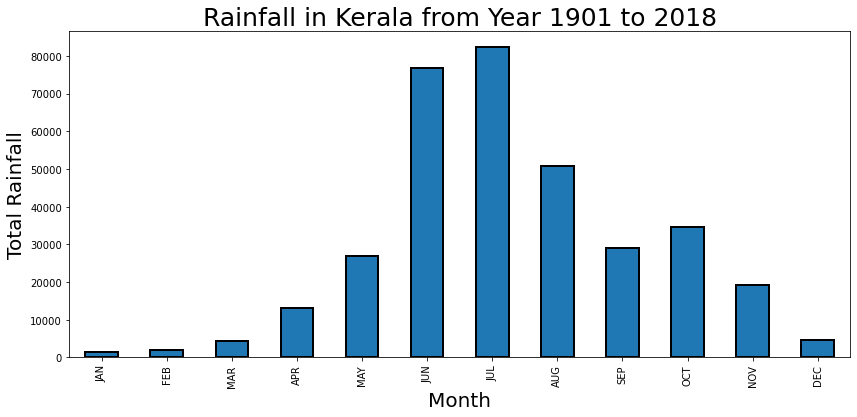

In [200]:
ax = df[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN','JUL','AUG', 'SEP', 'OCT','NOV','DEC']].sum().plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2,figsize=(14,6))
plt.xlabel('Month',fontsize=20)
plt.ylabel('Total Rainfall',fontsize=20)
plt.title('Rainfall in Kerala from Year 1901 to 2018',fontsize=25)

#rainfall from year 1901 to 2018 (118 years)

In [201]:
df[[" ANNUAL RAINFALL", "FLOODS"]]

,ANNUAL RAINFALL,FLOODS
0,3248.6,YES
1,3326.6,YES
2,3271.2,YES
3,3129.7,YES
4,2741.6,NO
...,...,...
113,3046.4,YES
114,2600.6,NO
115,2176.6,NO
116,2117.1,NO


In [202]:
df.groupby("FLOODS").max()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
FLOODS,,,,,,,,,,,,,,,
NO,KERALA,2017,74.5,79.0,217.2,238.0,683.0,990.0,1027.6,641.9,470.3,567.9,295.4,155.5,2931.1
YES,KERALA,2018,83.5,54.7,116.0,210.7,738.8,1098.2,1526.5,1398.9,526.7,543.2,365.6,202.3,4473.0


<AxesSubplot:xlabel=' ANNUAL RAINFALL'>

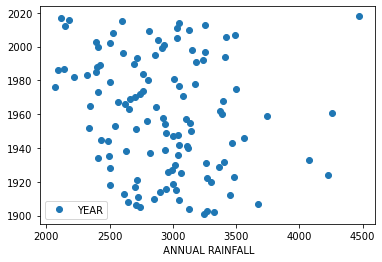

In [203]:
df.plot(x=" ANNUAL RAINFALL", y='YEAR', style='o')

In [204]:
# replacing the yes/no in floods coloumn by 1/0
df['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)

In [205]:
df

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,1
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,0
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,0
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,0


In [206]:
x=df.iloc[:,1:14]
x.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [207]:
y=df.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      0
      ..
113    1
114    0
115    0
116    0
117    1
Name: FLOODS, Length: 118, dtype: int64

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size = 0.2 )

In [209]:
print("shape of original dataset :", df.shape)
print("shape of input - training set :", X_train.shape)
print("shape of output - training set :", y_train.shape)
print("shape of input - testing set :", X_test.shape)
print("shape of output - testing set :", y_test.shape)

shape of original dataset : (118, 16)
shape of input - training set : (94, 12)
shape of output - training set : (94,)
shape of input - testing set : (24, 12)
shape of output - testing set : (24,)


In [210]:
X_test

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
86,0.6,0.8,4.3,57.2,108.3,572.6,221.0,396.6,157.0,272.1,216.0,131.1
85,5.6,18.7,11.2,63.1,126.7,597.9,324.8,340.3,235.4,165.5,194.7,9.5
94,10.3,6.5,37.3,134.9,355.6,493.4,702.5,457.3,280.0,198.3,182.6,0.1
8,54.1,11.8,61.3,93.8,473.2,704.7,782.3,258.0,195.4,212.1,171.1,32.3
89,14.9,4.8,18.0,41.8,488.5,528.6,635.4,370.8,103.3,323.2,158.8,5.2
22,24.7,0.7,78.9,43.5,80.0,722.5,1008.7,943.0,254.3,203.1,83.9,41.6
7,8.0,20.8,38.2,102.9,142.6,592.6,902.2,352.9,175.9,253.3,47.9,11.0
10,3.0,4.3,18.2,51.0,180.6,990.0,705.3,178.6,60.2,302.3,145.7,87.6
45,1.8,5.4,108.4,139.8,83.0,919.0,671.7,695.6,199.4,266.1,273.0,202.3
68,2.7,6.4,19.4,117.2,227.4,550.5,818.8,284.8,216.4,235.6,119.4,66.3


In [211]:
y_train=y_train.astype('int')
y_train

109    1
13     0
63     0
71     0
26     1
      ..
114    0
67     1
64     0
47     1
44     0
Name: FLOODS, Length: 94, dtype: int32

In [212]:
y_test=y_test.astype('int')
y_test

86     0
85     0
94     0
8      1
89     0
22     1
7      0
10     0
45     1
68     0
33     0
110    1
2      1
51     0
117    1
73     0
30     1
43     0
84     0
75     0
62     0
102    0
16     0
24     1
Name: FLOODS, dtype: int32

In [213]:
##breast cancer notebook - TRAIN THE MODEL ON THE DATA

clf_lg = LogisticRegression()
clf_dt = DecisionTreeClassifier(max_depth=4, random_state=42)
clf_rf = RandomForestClassifier(random_state=42, max_depth=4)

clf_lg.fit(X_train, y_train)
clf_rf.fit(X_train, y_train)
clf_dt.fit(X_train, y_train)

for clf in [clf_lg, clf_rf, clf_dt]:
    clf_name = clf.__class__.__name__
    print ('Classifier: {}'.format(clf_name))
    cv_score = np.mean(cross_val_score(clf, X_train, y_train, cv=3, scoring='roc_auc'))
    acc_score = np.mean(cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy'))
    print ('ROC_AUC CV score is {}'.format(cv_score))
    print ('Acc CV score is {}'.format(acc_score))
    print ("")

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier: LogisticRegression


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

ROC_AUC CV score is 0.652816682228447
Acc CV score is 0.5950940860215054

Classifier: RandomForestClassifier
ROC_AUC CV score is 0.9375194522253345
Acc CV score is 0.8293010752688171

Classifier: DecisionTreeClassifier
ROC_AUC CV score is 0.7091503267973854
Acc CV score is 0.7130376344086021



In [214]:
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

In [215]:
##breast cancer notebook - Testing on test sets

for clf in [clf_lg, clf_rf, clf_dt]:
    clf_name = clf.__class__.__name__
    print ('Classifier: {}'.format(clf_name))
    prediction = clf.predict(X_test)
    cv_score = roc_auc_score(y_test,prediction)
    print ('ROC_AUC score for test is {}'.format(cv_score))
    print ("")
    print (classification_report(y_test,prediction))
    print ("*"*100)
    print ("")

Classifier: LogisticRegression
ROC_AUC score for test is 0.375

              precision    recall  f1-score   support

           0       0.55      0.38      0.44        16
           1       0.23      0.38      0.29         8

    accuracy                           0.38        24
   macro avg       0.39      0.38      0.37        24
weighted avg       0.44      0.38      0.39        24

****************************************************************************************************

Classifier: RandomForestClassifier
ROC_AUC score for test is 0.75

              precision    recall  f1-score   support

           0       0.91      0.62      0.74        16
           1       0.54      0.88      0.67         8

    accuracy                           0.71        24
   macro avg       0.72      0.75      0.70        24
weighted avg       0.79      0.71      0.72        24

****************************************************************************************************

Classifier: